In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Existing Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.9                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
N = 500                         # Number of nodes: 500, 2000
m = 4                           # minimum degree: 4, 20
B = 0.5                         # minority fraction: 0.1, 0.3, 0.5
H = 1.0                         # Homophily: 0.0, 0.1, 0.2, ..., 1.0
epoch = 1                       # x out of 5 
DATAPATH = "../data/"              # networkx graph files path
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(io.get_random_datafn(DATAPATH,kind,N,m,B,H))
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 500
Number of edges: 1977
Average degree:   7.9080
{'labels': ['blue', 'red'], 'fullname': 'BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9', 'm': '4', 'attributes': ['color'], 'H': '1.0', 'km': 7.92, 'class': 'color', 'group': ['M', 'm'], 'name': 'homophilic_barabasi_albert', 'i': '2', 'h': 1.0, 'N': '500', 'kind': None, 'k': 7.908, 'B': '0.5', 'b': 0.5, 'e': 1977, 'min_degree': 4, 'x': '5', 'density': 0.015847695390781562, 'n': 500, 'kM': 7.896}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 450
Number of edges: 1575
Average degree:   7.0000
{'labels': ['blue', 'red'], 'fullname': 'BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9', 'm': 2, 'attributes': ['color'], 'H': 1.0134419135681014, 'km': 7.008849557522124, 'name': 'homophilic_barabasi_albert', 'group': ['M', 'm'], 'class': 'color', 'pseeds': 0.9, 'i': '2', 'h': 1.0, 'N': 450, 'epoch': 1, 'k': 7.0, 'e': 1575, 'B': 0.49777777777777776, 'x': '5', 'density': 0.015590200445434299, 'kind': None, 'kM': 6.991071428571429, 'method': 'nodes'}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

blue    0.497788
red     0.502212
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.999362  0.000638
red   0.000631  0.999369


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 1, 0, 0, 1)
(0, 1, 0, 0, 1)
(4.798143606190576e-53, 1.0, 4.798143606190576e-53, 4.798168920912389e-53, 1.0)

Prediction in 33.8653826713562 seconds
ROCAUC: 1.0
ROCAUC curve: 1.0
MAE: 0.0
ccm: 1.0
ccM: 1.0
bias: 0.5

BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9_nodes creating...
BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9_nodes created!
BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9_nodes/P90_graph.gpickle saved!
BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9_nodes/P90_samplegraph.gpickle saved!
BAH-N500-m4-B0.5-H1.0-i2-x5-h1.0-k7.9-km7.9-kM7.9_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

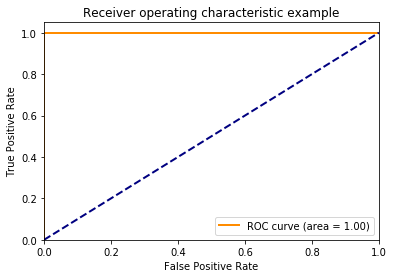

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)